In [1]:
!pip install wbdata
import wbdata

from plotly.offline import init_notebook_mode, iplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)


In [52]:
# population(year=2000,sex='Male',age_range=(0,100),place='WLD')
def population(year, sex, age_range, place):
    
    age_bins = [age_range[0], age_range[1]]
    
    # find the age ranges required
    age_ranges = []

    # Obtain lower end of lower age range
    if age_bins[0] % 5 != 0:
        age = 0
        while age_bins[0] - 5 > age:
            age = age + 5
        age_bins[0] = age
    
    # Ranges top out at 80, and go in five year increments
    for i in range(age_bins[0],age_bins[1],5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

    if age_bins[1] >= 80:
        age_ranges.append("80UP")
    
    # determine indicators (age range + sex)
    variables = {}
    if sex=='Male':
        variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    elif sex=='Female':
        variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    else:
        variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        f_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables.update(f_variables)
    
    # obtain relevant dataframe from wbdata
    df = wbdata.get_dataframe(variables, place)
    
    df = df.reset_index()
    df = df[df['date']==str(year)]
    
    # array of relevant values
    pop_array = df.pivot(columns='date').iloc[0]
    
    lower_bound_yrs = 5 - age_range[0] % 5
    upper_bound_yrs = age_range[1] % 5
    
    #print(pop_array)
    
    # adjust the 5 year intervals to more accurate ranges
    if lower_bound_yrs > 0:
        pop_array[0] = pop_array[0] * lower_bound_yrs / 5
    if upper_bound_yrs > 0:
        pop_array[-1] = pop_array[-1] * upper_bound_yrs / 5
    
    #print(pop_array)
    
    return sum(pop_array)

population(year=2000, sex='Male', age_range=(1, 3), place='IND')

32751362.4

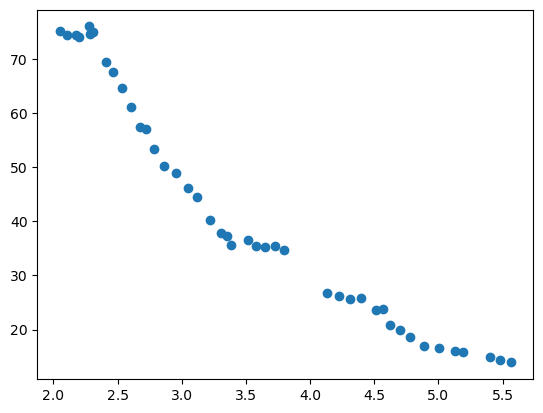

In [25]:
vars = {
    "SP.DYN.TFRT.IN": "Total Fertility Rate",
    "SE.SEC.ENRR.FE": "Secondary School Enrollment (Female, % Gross)"
}

school = wbdata.get_dataframe(vars,country='IND').dropna().sort_index()
plt.scatter('Total Fertility Rate', 'Secondary School Enrollment (Female, % Gross)', data=school)

    date  Livestock index  Food index  Crop index    Population
0   2021              NaN         NaN         NaN  1.407564e+09
1   2020           116.45      116.38      115.29  1.396387e+09
2   2019           119.43      115.29      112.91  1.383112e+09
3   2018           118.09      115.01      111.82  1.369003e+09
4   2017           111.11      108.96      107.48  1.354196e+09
..   ...              ...         ...         ...           ...
57  1964            16.61       23.86       26.61  4.890593e+08
58  1963            16.64       23.31       25.94  4.779336e+08
59  1962            16.59       22.80       25.20  4.670242e+08
60  1961            16.49       23.13       25.46  4.563519e+08
61  1960              NaN         NaN         NaN  4.459546e+08

[62 rows x 5 columns]


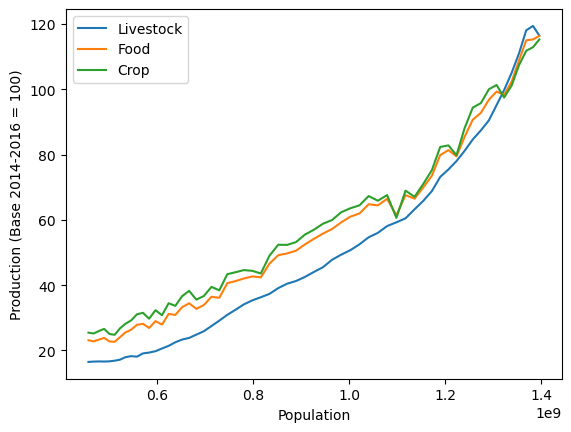

In [3]:
#wbdata.get_indicator()
"""
Agriculture Production Indices:

AG.PRD.AGRI.XD                                     Agriculture production index (1999-2001 = 100)
AG.PRD.BLY.MT                                      Barley production (metric tons)
AG.PRD.CREL.MT                                     Cereal production (metric tons)
AG.PRD.CREL.XD                                     Cereal production index (1999-2001 = 100)
AG.PRD.CROP.XD                                     Crop production index (2014-2016 = 100)
AG.PRD.FNO.MT                                      Fonio production (metric tons)
AG.PRD.FOOD.XD                                     Food production index (2014-2016 = 100)
AG.PRD.GAGRI.XD                                    Agriculture production index (gross, 1999-2001 = 100)
AG.PRD.GCREL.XD                                    Cereal production index (gross, 1999-2001 = 100)
AG.PRD.GCROP.XD                                    Crop production index (gross, 1999-2001 = 100)
AG.PRD.GFOOD.XD                                    Food production index (gross, 1999-2001 = 100)
AG.PRD.GLVSK.XD                                    Livestock production index (gross, 1999-2001 = 100)
AG.PRD.GNFOOD.XD                                   Non-food production index (gross, 1999-2001 = 100)
AG.PRD.LVSK.XD                                     Livestock production index (2014-2016 = 100)
AG.PRD.MLT.MT                                      Millet production (metric tons)
AG.PRD.MZE.MT                                      Maize production (metric tons)
AG.PRD.NFOOD.XD                                    Gross non-food production index (1999-2001 = 100)
AG.PRD.RICE.MT                                     Rice production (metric tons)
AG.PRD.RTTB.MT                                     Roots and tubers production (metric tons)
AG.PRD.SGM.MT                                      Sorghum production (metric tons)
AG.PRD.WHT.MT                                      Wheat production (metric tons)
"""

vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}


ag = wbdata.get_dataframe(vars,country='IND')
ag = ag.reset_index()
ag['date'] = ag['date'].astype(int)
print(ag)

lvsk = plt.plot('Population', 'Livestock index', data=ag, label='Livestock')
food = plt.plot('Population', 'Food index', data=ag, label='Food')
crop = plt.plot('Population', 'Crop index', data=ag, label='Crop')
plt.xlabel('Population')
plt.ylabel('Production (Base 2014-2016 = 100)')
plt.legend()
#plt.legend(['Livestock index', 'Food index', 'Crop index'])

In [7]:
#plt.plot(ag['date'], np.log(ag['Population']))
#plt.plot(ag['date'], ag['Food index'])
ag_idx = ag.set_index(ag['date']).drop(columns=['date'])
ag_asc = ag_idx.sort_index()
rates = np.log(ag_asc).diff().dropna()
#rates
px.scatter(rates, 
           x=rates.index, 
           y=['Population', 'Food index'], 
           labels={
               'value': 'Growth Rate (per year)',
               'date': 'Year'
           },
           title='Growth Rate of Food versus Population over Time',
           trendline='ols')#, data=pop_growth_rate)
#px.scatter(rates, x=rates.index, y='Food index', trendline='ols')#, data=pop_growth_rate)

Text(0, 0.5, 'Food Production (log)')

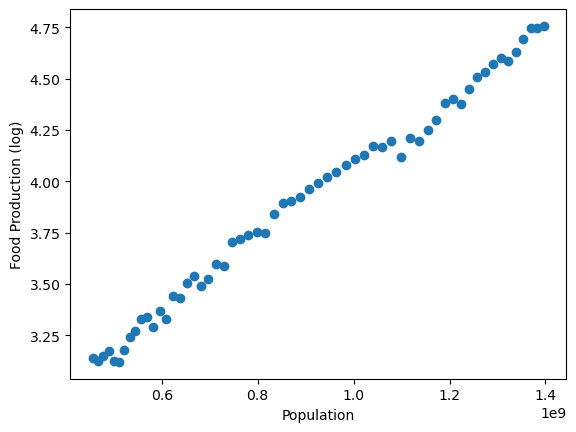

In [81]:
ag_idx = ag.set_index(ag['date']).drop(columns=['date'])
ag_idx['Food index (log)'] = np.log(ag_idx['Food index'])
#ag_idx_log = np.log(ag_idx).dropna()
plt.scatter('Population', 'Food index (log)', data=ag_idx)
plt.xlabel('Population')
plt.ylabel('Food Production (log)')